## Necessary imports

In [1]:
!pip install tf-models-official
!pip install -U scikit-learn
!pip install bokeh
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 8.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 KB 6.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
import math, re, os, sys
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
from itertools import islice
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from tensorflow.keras import layers, callbacks
from tensorflow_models.vision import augment

import warnings
warnings.filterwarnings("ignore")

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.12.0


In [3]:
# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None
    if 'GPU' in tf.test.gpu_device_name():
        print('Running on GPU', tf.test.gpu_device_name())
    else:
        print('Running on CPU')

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
elif 'GPU' in tf.test.gpu_device_name():
    strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


In [4]:
from shutil import rmtree

try:
    rmtree("/kaggle/working/Neural-Networks-2023-Project")
    print("Removing previous project folder")
    del sys.modules['utils.DataLoad']
    del DataLoad
    del sys.modules['utils.DataVisualization']
    del DataVisualization
except:
    print('No previous project folder found in working directory.')

! git clone https://github.com/m-tarro/Neural-Networks-2023-Project.git

sys.path.append('/kaggle/working/Neural-Networks-2023-Project/')

from utils.DataLoad import DataLoad
from utils.DataVisualization import DataVisualization

Removing previous project folder
No previous project folder found in working directory.
Cloning into 'Neural-Networks-2023-Project'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 102 (delta 41), reused 38 (delta 8), pack-reused 0
Receiving objects: 100% (102/102), 5.99 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (41/41), done.


## Data exploration

In [5]:
image_size = 224
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
print(BATCH_SIZE)

IMAGE_SIZE = [image_size, image_size]

data_load = DataLoad(image_size=image_size, batch_size=BATCH_SIZE)
data_vis = DataVisualization(data_load)

ds_explore = data_load.get_training_dataset(data_augment=False)
ds_iter = iter(ds_explore.unbatch().batch(20))

128


In [6]:
one_batch = next(ds_iter)
data_vis.display_batch_of_images(one_batch)

In [7]:
from tqdm import tqdm

class_counts = {}

# Get the total number of iterations
total_iterations = data_load.NUM_TRAINING_IMAGES

# Use tqdm to create a progress bar
for _, label in tqdm(ds_explore.unbatch(), total=total_iterations, desc='Processing images'):
    i = label.numpy()
    if data_load.CLASSES[i] not in class_counts:
        print(data_load.CLASSES[i])
        class_counts[data_load.CLASSES[i]] = 1
    else:
        class_counts[data_load.CLASSES[i]] += 1
        
    total_iterations -= 1  # Decrement the total_iterations count

    if total_iterations == 0:
        break  # Exit the loop when all elements have been processed

Processing images:   5%|▌         | 671/12753 [00:00<00:09, 1259.27it/s]

sword lily
wild rose
petunia
sunflower
pink primrose
magnolia
morning glory
common tulip
bougainvillea
iris
love in the mist
anthurium
yellow iris
primula
lotus
lenten rose
mallow
rose
wallflower
common dandelion
artichoke
foxglove
gaura
daisy
frangipani
peruvian lily
bishop of llandaff
bird of paradise
wild geranium
cyclamen 
spear thistle
snapdragon
trumpet creeper
tree poppy
thorn apple
pink quill
bromelia
water lily
canna lily
poinsettia
windflower
prince of wales feathers
californian poppy
hibiscus
clematis
silverbush
watercress
corn poppy
sweet william
osteospermum
azalea
buttercup
columbine
pink-yellow dahlia
bee balm
japanese anemone
mexican petunia
balloon flower
passion flower
purple coneflower
hippeastrum 
monkshood
great masterwort
camellia
carnation
pincushion flower
garden phlox
lilac hibiscus
marigold
bolero deep blue
blackberry lily
king protea
grape hyacinth
wild pansy
red ginger
colt's foot
fritillary
geranium
globe thistle
gazania
barberton daisy
black-eyed susan
rub

Processing images:  11%|█▏        | 1461/12753 [00:01<00:04, 2412.41it/s]

giant white arum lily
blanket flower
alpine sea holly
cautleya spicata
cosmos


Processing images:  18%|█▊        | 2322/12753 [00:01<00:03, 3304.93it/s]

cape flower


Processing images: 100%|█████████▉| 12752/12753 [00:03<00:00, 3471.51it/s]


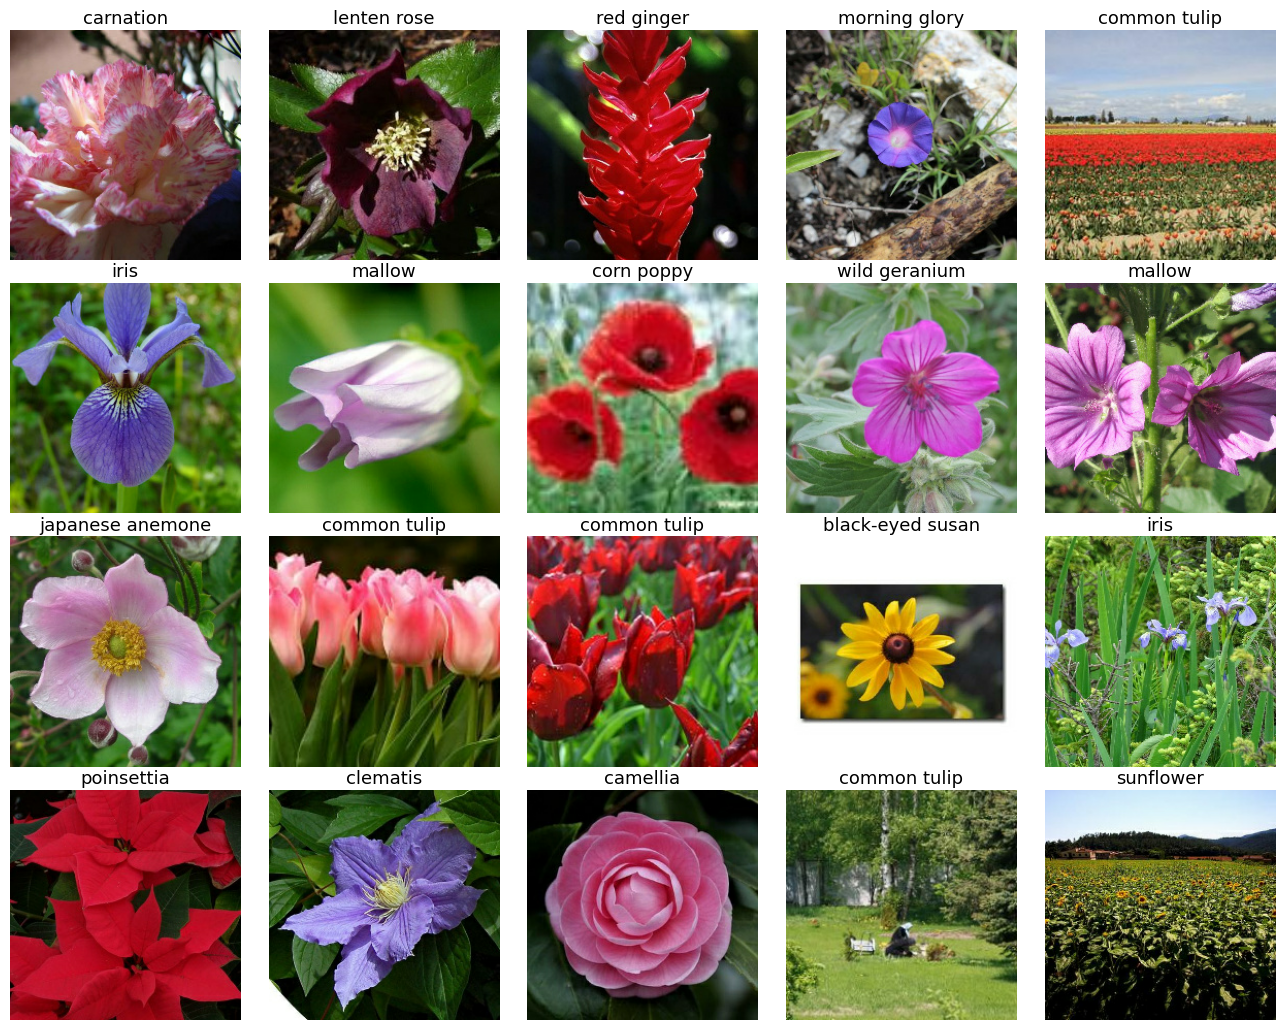

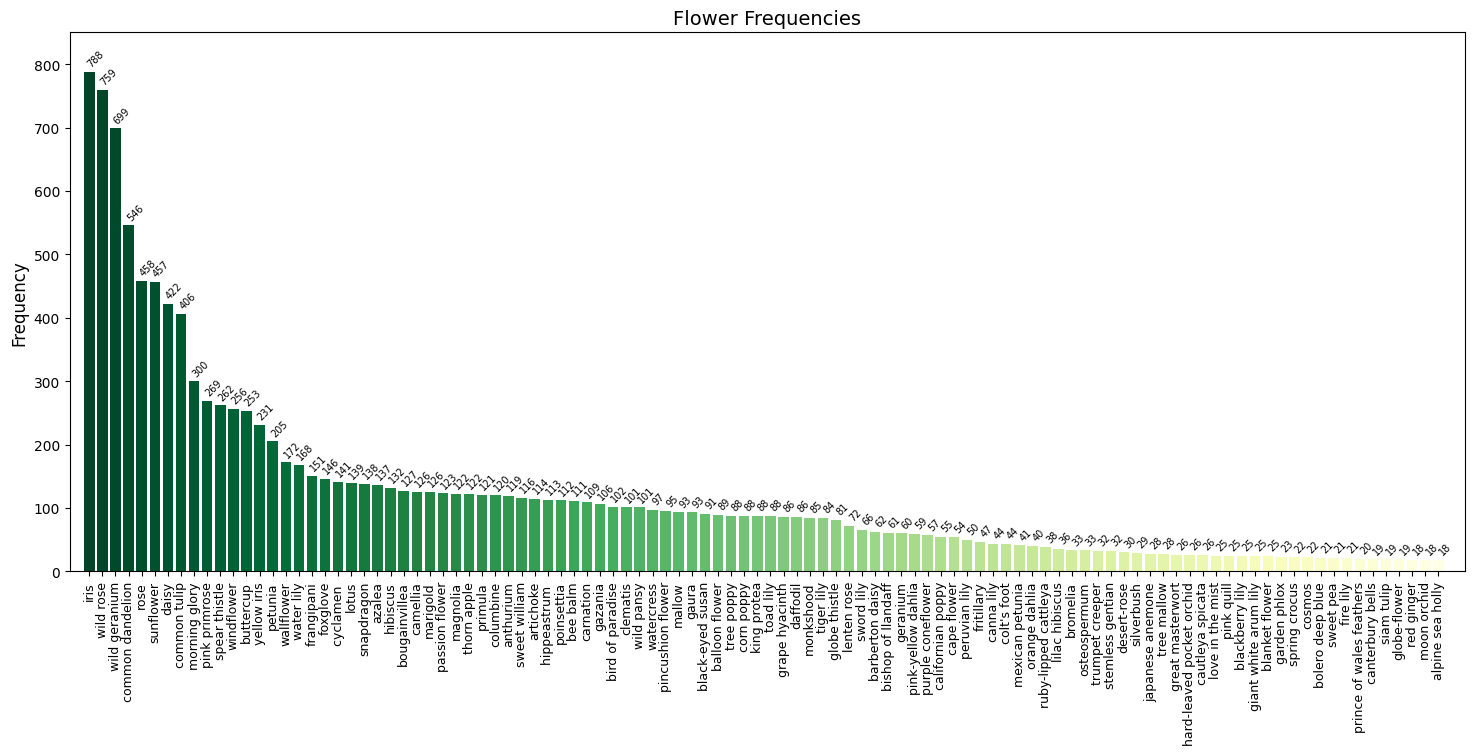

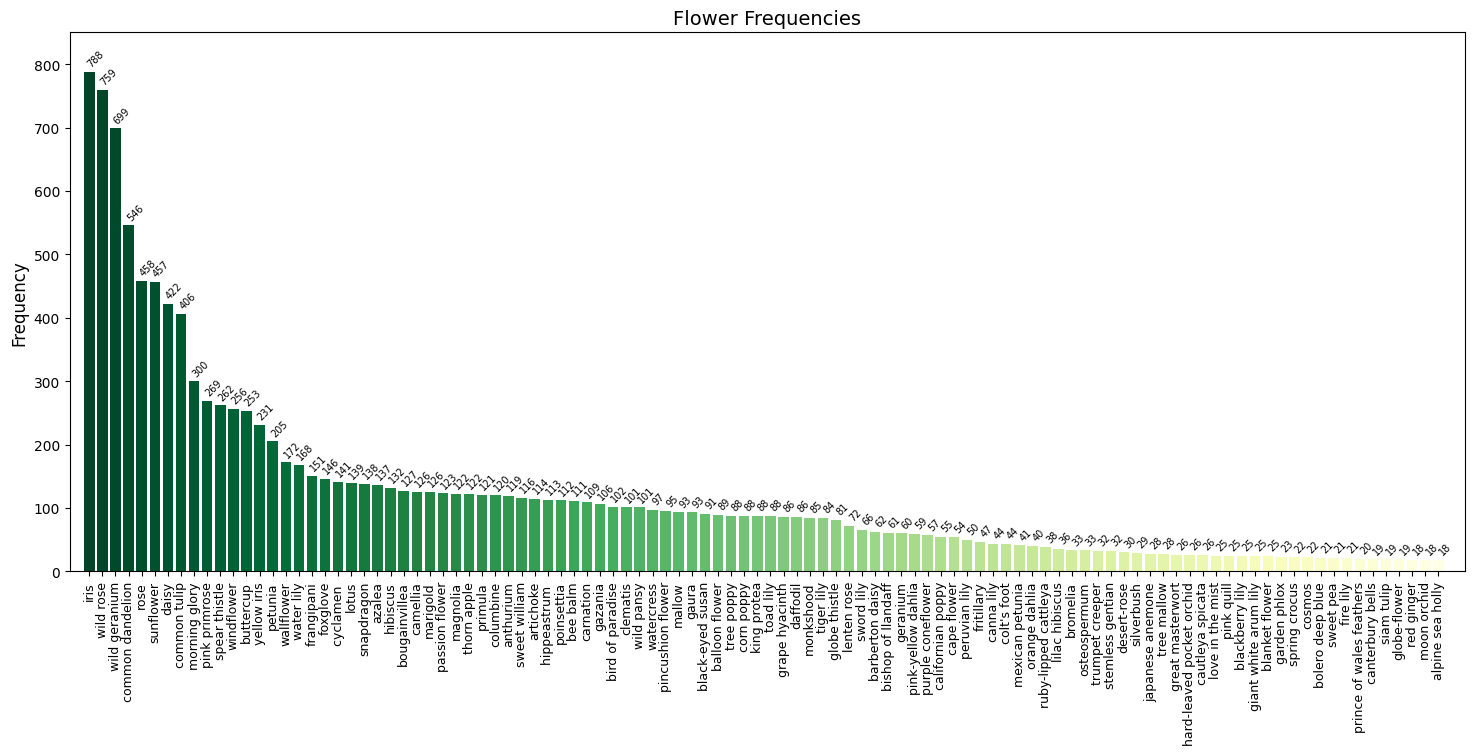

In [10]:
# Sort the data by values in descending order
sorted_data = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the flower names and corresponding frequencies
flowers = [item[0] for item in sorted_data]
frequencies = [item[1] for item in sorted_data]

colors = plt.cm.YlGn_r(np.linspace(0, 1, len(flowers)))

# Create the bar plot
plt.figure(figsize=(18, 7))
bars = plt.bar(flowers, frequencies, color=colors)

# Add counts to the top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 5, str(height), ha='center', va='bottom', fontsize=7, rotation = 45)

# Customize the plot
plt.xticks(rotation=90,fontsize=9)
#plt.xlabel('Flower', fontsize = 12)
plt.xlim(-1.5,105)
plt.ylim(0,850)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Flower Frequencies', fontsize = 14)

# Display the plot
plt.show()

In [11]:
from bokeh.plotting import figure, show, save
from bokeh.models import HoverTool, LinearColorMapper, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap

# Sort the data by values in descending order
sorted_data = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the flower names and corresponding frequencies
flowers = [item[0] for item in sorted_data]
frequencies = [item[1] for item in sorted_data]

# Normalize the frequencies between 0 and 1
normalized_freq = (frequencies - np.min(frequencies)) / (np.max(frequencies) - np.min(frequencies))

color_palette = [
    '#e5f5e0', '#d6efc9', '#c7e9b4', '#b8e39f', '#a9dd8a',
    '#9ad775', '#8bce60', '#7cc94b', '#6db336', '#5ead21',
    '#4fa40c', '#409d0a', '#319608', '#238906', '#147f04',
    '#057802', '#006d01', '#005f01', '#005101', '#004301'
]

# Create a continuous green color mapper
color_mapper = linear_cmap(field_name='frequencies', palette=color_palette, low=np.min(frequencies), high=np.max(frequencies))

# Create a ColumnDataSource to store the data
source = ColumnDataSource(data=dict(flowers=flowers, frequencies=frequencies))

# Create the figure
p = figure(x_range=flowers, height=600, width=900, toolbar_location=None, tools="hover", tooltips=[("Flower", "@flowers"), ("Frequency", "@frequencies")])

# Create the bars
p.vbar(x='flowers', top='frequencies', width=0.9, source=source, line_color='white', fill_color=color_mapper, fill_alpha=0.8)

# Customize the plot
p.xaxis.major_label_orientation = "vertical"
p.y_range.start = 0
# p.xaxis.axis_label = "Flower"
p.yaxis.axis_label = "Frequency"
p.title.text = "Flower Frequencies"
p.title.align = "center"

# Set axis and title text properties
# p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_orientation = 45
p.yaxis.axis_label_text_font_size = "11pt"
p.title.text_font_size = "14pt"
p.xgrid.grid_line_color = None

# Set hover tool properties
hover = p.select(dict(type=HoverTool))
hover.mode = 'vline'
hover.line_policy = 'nearest'
hover.point_policy = 'snap_to_data'
hover.tooltips = [("Flower", "@flowers"), ("Frequency", "@frequencies")]

# Show the plot
output_notebook()
show(p)

# Specify the output file name
#filename = "flower_frequencies.html"

# Save the plot
#save(p, filename=filename)

Loading BokehJS ...

## Model to implement

The data will load to data_load based on chosen `IMAGE_SIZE` and `BATCH_SIZE`. Then the model has to be compiled within `strategy.scope()`, compiled with chosen `optimizer`, `loss`, and `metrics`.

### Augmentations

In [12]:
!pip install -U tensorflow-addons==0.20.0
import tensorflow_addons as tfa

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [13]:
class Augmentations():
    
    def __init__(self, max_crop=0.6, max_rotate=20, **kwargs):
        super().__init__(**kwargs)
        # Specify the maximum amount of cropping and rotation (sampled randomly)
        self.max_crop = max_crop
        self.max_rotate = max_rotate
        
    def CutMixUp(batch_inputs):

        cutmixup = augment.MixupAndCutmix(
            mixup_alpha = 0.0,
            cutmix_alpha = 1.0,
            prob = 1.0,
            switch_prob = 1.0,
            label_smoothing = 0.1,
            num_classes = 104
        )
        cutmix_images, cutmix_labels = cutmixup.distort(images=batch_inputs[0], labels=batch_inputs[1])
        
        return [cutmix_images, cutmix_labels]
        
    # Function sampling random degrees for image rotation
    def rand_degree(self):
        lower = -self.max_rotate * (np.pi/180.0) # degrees -> radian
        upper =  self.max_rotate * (np.pi/180.0) 
        return np.random.uniform(lower, upper), self.max_rotate

    # Our manual augmentation function
    def manual_augment(self, image, label):
        #data augmentation to prevent overfitting and to find more patterns.
        
        # Image dimensions
        height, width = image.shape[-3:-1]
        
        # Crop image
        crop = np.random.uniform(self.max_crop,1) # Sample crop size
        box_top  = int(np.random.uniform(0,(1-crop)*height)) # Sample crop location
        box_left = int(np.random.uniform(0,(1-crop)*width))
        
        cropped = tf.image.crop_to_bounding_box(image, box_top, box_left, int(height*crop), int(width*crop)) # Crop image
        image = tf.image.resize(cropped, (height, width), method='bilinear') # Resize to original image size

        # Alter image
        image = tf.image.random_flip_left_right(image)  # Flipping left-right makes sense due to flower variation
        image = tf.image.random_saturation(image, 0, 3) # Random saturation makes sense due to growth cycles, lighting
        
        # Rotate image
        degree, max_rotate = self.rand_degree() # Sample angle
        
        if np.abs(degree) > (max_rotate/6) * (np.pi/180.0): # If angle is big enough, rotate
            image = tfa.image.rotate(image, degree, fill_mode='nearest')  # Rotation makes sense due to flower variation, foto angle
            
    
        #image = tf.image.random_flip_up_down(image)    # Flipping up-down does not make sense because flowers don't grow that way
        #image = tf.image.random_brightness(image, 0.1) 
        
        return image, label
    
    def combination(self, batch):
        batch = batch.map(lambda x, y: self.CutMixUp([x, y]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
        batch = batch.map(self.manual_augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        return batch

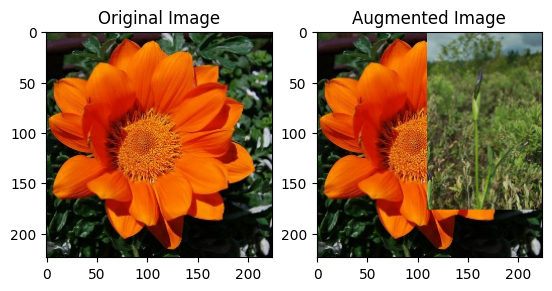

In [20]:
# Cutmix test

ds_train_original = data_load.get_training_dataset(data_augment = False, ordered = True)
ds_train_no_augment = ds_train_original.take(1).cache().repeat()

ds_train_augment = ds_train_no_augment.map(lambda x, y: Augmentations.CutMixUp([x, y]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_train_augment = ds_train_augment.map(Augmentations.manual_augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)

index = 1 # Use the same index for both datasets
augmented_images, labels = next(islice(ds_train_augment, index, None))
original_images, labels = next(islice(ds_train_no_augment, index, None))

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(original_images[0].numpy())
axes[0].set_title("Original Image")
axes[1].imshow(augmented_images[0].numpy())
axes[1].set_title("Augmented Image")
plt.show()

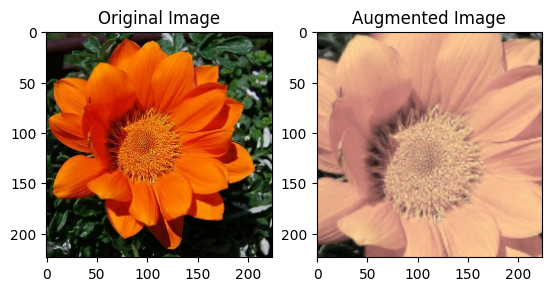

In [29]:
from itertools import islice
import matplotlib.pyplot as plt

ds_train_original = data_load.get_training_dataset(data_augment = False, ordered = True)
ds_train_no_augment = ds_train_original.take(1).cache().repeat()

ds_train_aug = data_load.get_training_dataset(data_augment = Augmentations().manual_augment, ordered = True)
ds_train_augment = ds_train_aug.take(1).cache().repeat()

index = 1 # Use the same index for both datasets
augmented_images, labels = next(islice(ds_train_augment, index, None))
original_images, labels = next(islice(ds_train_no_augment, index, None))

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(original_images[0].numpy())
axes[0].set_title("Original Image")
axes[1].imshow(augmented_images[0].numpy())
axes[1].set_title("Augmented Image")
plt.show()

In [ ]:
"""
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten

gu_seed = tf.keras.initializers.GlorotUniform(seed=1)

with strategy.scope():
    pretrained_model = tf.keras.applications.vgg16.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=[*IMAGE_SIZE, 3],
        classes=len(data_load.CLASSES),
        classifier_activation='softmax'
    )
    pretrained_model.trainable = False
    
    for layer in pretrained_model.layers[15:]:
        layer.trainable = True
    
    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.BatchNormalization(),  
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.BatchNormalization(),  
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(2048, activation="relu"),
        tf.keras.layers.BatchNormalization(),  
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2048, activation="relu"),
        tf.keras.layers.BatchNormalization(),  
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.BatchNormalization(),  
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(len(data_load.CLASSES), activation='softmax')
    ])
"""

In [21]:
import efficientnet.tfkeras as efficientnet

with strategy.scope():
#     pretrained_model = tf.keras.applications.InceptionResNetV2(
#     weights = 'imagenet', 
#     include_top = False, 
#     input_shape = [*IMAGE_SIZE, 3])

#     pretrained_model = tf.keras.applications.MobileNetV2(
#         weights = 'imagenet', 
#         include_top = False, 
#         input_shape = [*IMAGE_SIZE, 3])
    
#     pretrained_model = tf.keras.applications.ResNet152V2(
#         weights = 'imagenet', 
#         include_top = False, 
#         input_shape = [*IMAGE_SIZE, 3])
    
#     pretrained_model = tf.keras.applications.InceptionV3(
#         weights = 'imagenet', 
#         include_top = False, 
#         input_shape = [*IMAGE_SIZE, 3])
    
    pretrained_model = efficientnet.EfficientNetB7(
         weights = 'noisy-student', 
         include_top = False, 
         input_shape = [*IMAGE_SIZE, 3])
    
#   pretrained_model = tf.keras.applications.DenseNet201(
#       weights = 'imagenet', 
#       include_top = False, 
#       input_shape = [*IMAGE_SIZE, 3])
        
#     pretrained_model = tf.keras.applications.xception.Xception(
#         weights='imagenet',
#         include_top=False ,
#         input_shape=[*IMAGE_SIZE, 3]
#     )

#     pretrained_model = tf.keras.applications.nasnet.NASNetLarge(
#         weights = 'imagenet', 
#         include_top = False, 
#         input_shape = [*IMAGE_SIZE, 3])

#     pretrained_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L(
#         weights = 'imagenet', 
#         include_top = False, 
#         input_shape = [*IMAGE_SIZE, 3])

#     pretrained_model = tf.keras.applications.vgg16.VGG16(
#         weights = 'imagenet', 
#         include_top = False, 
#         input_shape = [*IMAGE_SIZE, 3])



    pretrained_model.trainable = True
    
    model = tf.keras.Sequential([        
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(data_load.CLASSES), activation='softmax')
    ])

258068648/258068648 [==============================] - 2s 0us/step


### Learning rate

Learning rate schedule: start = 1e-05; peak = 5e-05; end = 1.02e-05


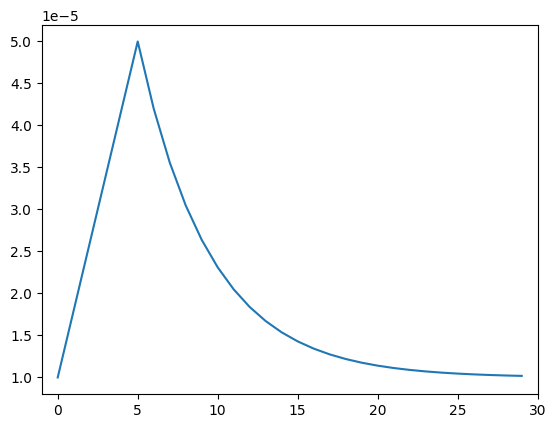

In [22]:
EPOCHS = 30
STEPS_PER_EPOCH = data_load.TRAINING_STEPS_PER_EPOCH

# define a fine-tuned schedule for the Learning Rate Scheduler 
def exponential_lr(epoch,
                  start_lr=0.00001,min_lr=0.00001,max_lr=0.00005,
                  rampup_epochs = 5, sustain_epochs = 0,
                  exp_decay = 0.8):  # original exp_decay = 0.8
    def lr(epoch, start_lr, min_lr,max_lr,rampup_epochs,sustain_epochs,
          exp_decay):
        # linear increase from start to rampup_epochs
        if epoch < rampup_epochs:
            lr= ((max_lr-start_lr)/
                rampup_epochs * epoch + start_lr)
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr 
        else:
            lr = ((max_lr - min_lr)* exp_decay ** (epoch-rampup_epochs-sustain_epochs)
                  + min_lr)
            
        return lr
    return lr(epoch,start_lr,min_lr,max_lr,rampup_epochs,sustain_epochs,exp_decay)

# set learning rate scheduler for callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule=exponential_lr,verbose=True)

# learning rate chart
epoch_rng = [i for i in range(EPOCHS)] 
y = [exponential_lr(x) for x in epoch_rng]
plt.plot(epoch_rng,y)
plt.xlim(-1, EPOCHS)

print("Learning rate schedule: start = {:.3g}; peak = {:.3g}; end = {:.3g}".format(y[0], max(y), y[-1]))

### Model compiling

In [15]:
ds_train = data_load.get_training_dataset(data_augment=Augmentations().manual_augment)
ds_valid = data_load.get_validation_dataset()
ds_test = data_load.get_test_dataset(ordered=True)

In [23]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model_name = 'efficientNet_minaug'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b7 (Functional  (None, 7, 7, 2560)       64097680  
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 104)               266344    
                                                                 
Total params: 64,364,024
Trainable params: 64,053,304
Non-trainable params: 310,720
_________________________________________________________________


Now it is possible to augment the images within `data_augment` function, pick the number of `EPOCHS`, and fit the model.

### Augmentation visualisation

## Training

In [31]:
EPOCHS = 3
STEPS_PER_EPOCH = data_load.TRAINING_STEPS_PER_EPOCH

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[lr_callback, early_stopping],
    # callbacks=[early_stopping]
    # class_weight = weight_per_class #tuning11
)


Epoch 1: LearningRateScheduler setting learning rate to 4.199999966658652e-05.
Epoch 1/3
99/99 [==============================] - 36s 352ms/step - loss: 0.2562 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.4498 - val_sparse_categorical_accuracy: 0.8941 - lr: 4.2000e-05

Epoch 2: LearningRateScheduler setting learning rate to 4.359999973326921e-05.
Epoch 2/3
99/99 [==============================] - 29s 295ms/step - loss: 0.2311 - sparse_categorical_accuracy: 0.9363 - val_loss: 0.4493 - val_sparse_categorical_accuracy: 0.8952 - lr: 4.3600e-05

Epoch 3: LearningRateScheduler setting learning rate to 4.6160000561503696e-05.
Epoch 3/3
99/99 [==============================] - 32s 323ms/step - loss: 0.2097 - sparse_categorical_accuracy: 0.9414 - val_loss: 0.4442 - val_sparse_categorical_accuracy: 0.8963 - lr: 4.6160e-05


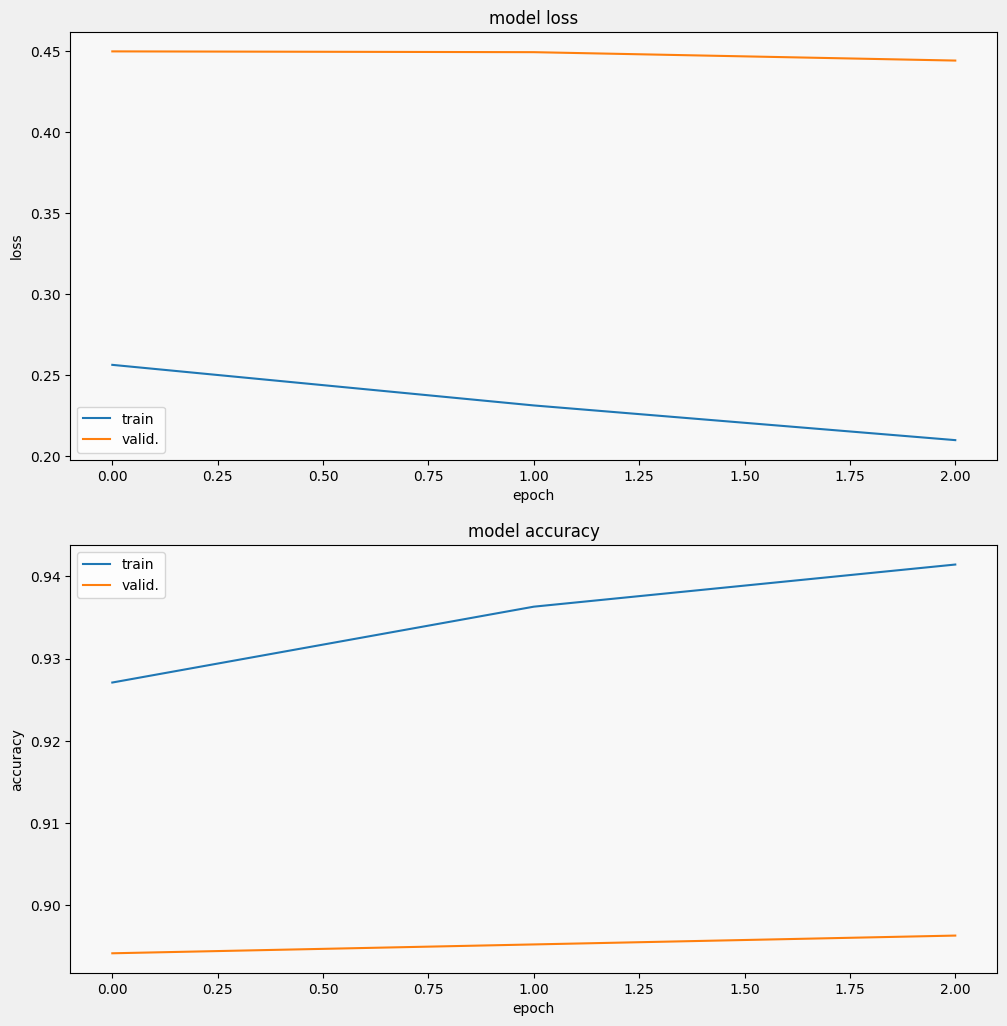

In [32]:
data_vis.display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss',
    211
)
data_vis.display_training_curves(
    history.history['sparse_categorical_accuracy'],
    history.history['val_sparse_categorical_accuracy'],
    'accuracy',
    212
)

In [ ]:
"""
np.save(f'history_{model_name}.npy',history.history)
model.save(f'model_{model_name}.h5')
"""

## Testing 10 different models

In [ ]:
"""
image_size = 224
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

IMAGE_SIZE = [image_size, image_size]

data_load = DataLoad(image_size=image_size, batch_size=BATCH_SIZE)

ds_train = data_load.get_training_dataset(data_augment=no_data_augment)
ds_valid = data_load.get_validation_dataset()
ds_test = data_load.get_test_dataset()

EPOCHS = 30
STEPS_PER_EPOCH = data_load.TRAINING_STEPS_PER_EPOCH
"""

In [ ]:
"""
from tensorflow.keras import layers, callbacks

import efficientnet.tfkeras as efficientnet


with strategy.scope():
    inception_resnet_v2 = tf.keras.applications.InceptionResNetV2(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    inception_v3 = tf.keras.applications.InceptionV3(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    mobilenet_v2 = tf.keras.applications.MobileNetV2(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    resnet_152_v2 = tf.keras.applications.ResNet152V2(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    efficientnet_b7 = efficientnet.EfficientNetB7(
             weights = 'noisy-student', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    efficientnet_v2l = tf.keras.applications.efficientnet_v2.EfficientNetV2L(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    densenet_201 = tf.keras.applications.DenseNet201(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    xception_ = tf.keras.applications.xception.Xception(
             weights='imagenet',
             include_top=False ,
             input_shape=[*IMAGE_SIZE, 3])

    nasnet_large = tf.keras.applications.nasnet.NASNetLarge(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    vgg16_ = tf.keras.applications.vgg16.VGG16(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])


    models = [inception_resnet_v2,inception_v3,mobilenet_v2,resnet_152_v2,efficientnet_b7,efficientnet_v2l,densenet_201,xception_,nasnet_large,vgg16_]

    model_names = ['InceptionResNetV2','InceptionV3','MobileNetV2','ResNet152V2','EfficientNetB7','EfficientNetV2L','DenseNet201','Xception','NASNetLarge','VGG16']
    
    """

In [ ]:
"""
# Directory to save the models
save_dir = 'saved_models_before'

# Create the save directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
"""

In [ ]:
"""
# Loop over the models
for i in range(len(models)):
    with strategy.scope():
    
        pretrained_model = models[i]
        model_name = model_names[i]
        
        # Set the pretrained model as trainable
        pretrained_model.trainable = True
        
        # Create a new model
        model = tf.keras.Sequential([
            pretrained_model,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(len(data_load.CLASSES), activation='softmax')
        ])
        
        # Compile the model
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy']
        )

        # Print model summary
        model.summary()

        # Save the model
        model_path = os.path.join(save_dir, f'{model_name}.h5')
        model.save(model_path)
        print(f'Saved model {model_name} at {model_path}')
"""

In [ ]:
"""
# Directory to save the models
save_dir = 'saved_models_after'

# Create the save directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
"""

In [ ]:
""""
early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0.001,
            patience=5,
            restore_best_weights=True
        )
"""

In [ ]:
"""

# Define the paths for loading and saving models
load_dir = 'saved_models_before'  # Path to the folder containing the saved models
save_dir = 'saved_models_after'  # Path to the folder to save the trained models

# List the files in the load directory
model_files = os.listdir(load_dir)

# Dictionary to store model results
model_results = {}

cmdataset = data_load.get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(data_load.NUM_VALIDATION_IMAGES))).numpy()
labels = range(len(data_load.CLASSES))
    
# Loop through the model files
for model_file in model_files:
    with strategy.scope():
        # Load the model
        print(model_file + ":")
        model_path = os.path.join(load_dir, model_file)
        model = tf.keras.models.load_model(model_path)

        # Train the model
        history = model.fit(
            ds_train,
            validation_data=ds_valid,
            epochs=EPOCHS,
            steps_per_epoch=STEPS_PER_EPOCH,
            callbacks=[early_stopping])

        # Save the model and training history
        trained_model_name = f'trained_{model_file}'  # You can modify the name if desired
        trained_model_path = os.path.join(save_dir, trained_model_name)
        model.save(trained_model_path)
        print(f'Saved trained model {trained_model_name} at {trained_model_path}')

        history_path = f'history_{model_file}.npy'
        np.save(history_path, history.history)
        print(f'Saved training history at {history_path}')
    
    # Evaluate the model
    cm_probabilities = model.predict(images_ds)
    cm_predictions = np.argmax(cm_probabilities, axis=-1)

    score = f1_score(
        cm_correct_labels,
        cm_predictions,
        labels=labels,
        average='macro')

    precision = precision_score(
        cm_correct_labels,
        cm_predictions,
        labels=labels,
        average='macro')

    recall = recall_score(
        cm_correct_labels,
        cm_predictions,
        labels=labels,
        average='macro')

    model_results[model_file] = [score, precision, recall]

"""

In [ ]:
"""

results = pd.DataFrame.from_dict(model_results, orient='index', columns=['f1', 'precision', 'recall'])
results.index.name = 'Model'

results = results.sort_values(by='f1', ascending=False)

results.index = results.index.str.replace('.h5', '')

print(results)

"""

In [ ]:
"""
# Set color scheme for the bars
colors = ['tab:red', 'tab:blue', 'tab:green']
other_color = 'lightgray'

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set color for the first three columns and gray for the rest
bar_colors = [colors[i] if i < 3 else other_color for i in range(len(results))]

results['f1'].plot(kind='bar', ax=ax, color=bar_colors)

# Add labels to the bars
for i, value in enumerate(results['f1']):
    ax.text(i, value, f'{value:.3f}', ha='center', va='bottom', color='black')

# Set the tick labels
ax.set_xticklabels(results.index, rotation=45)

# Set axis labels and title
ax.set_xlabel('')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores')

# Display the plot
plt.tight_layout()
plt.show()
"""

In [ ]:
"""
results.to_csv('results.csv')

"""

## Augmentation training

In [33]:
with strategy.scope():

    efficientnet_b7 = efficientnet.EfficientNetB7(
             weights = 'noisy-student', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    densenet_201 = tf.keras.applications.DenseNet201(
             weights = 'imagenet', 
             include_top = False, 
             input_shape = [*IMAGE_SIZE, 3])

    xception_ = tf.keras.applications.xception.Xception(
             weights='imagenet',
             include_top=False ,
             input_shape=[*IMAGE_SIZE, 3])

    models = [efficientnet_b7,densenet_201,xception_]

    model_names = ['EfficientNetB7','DenseNet201','Xception']

83683744/83683744 [==============================] - 1s 0us/step


In [34]:
# Directory to save the models
save_dir = 'saved_models_before'

# Create the save directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [35]:
# Loop over the models
for i in range(len(models)):
    with strategy.scope():
    
        pretrained_model = models[i]
        model_name = model_names[i]
        
        # Set the pretrained model as trainable
        pretrained_model.trainable = True
        
        # Create a new model
        model = tf.keras.Sequential([
            pretrained_model,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(len(data_load.CLASSES), activation='softmax')
        ])
        
        # Compile the model
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy']
        )

        # Print model summary
        model.summary()

        # Save the model
        model_path = os.path.join(save_dir, f'{model_name}.h5')
        model.save(model_path)
        print(f'Saved model {model_name} at {model_path}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b7 (Functional  (None, 7, 7, 2560)       64097680  
 )                                                               
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 104)               266344    
                                                                 
Total params: 64,364,024
Trainable params: 64,053,304
Non-trainable params: 310,720
_________________________________________________________________
Saved model EfficientNetB7 at saved_models_before/EfficientNetB7.h5
Model: "sequential_2"
_________________________________________________________________
 Layer (type

In [36]:
image_size = 224
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

IMAGE_SIZE = [image_size, image_size]

data_load = DataLoad(image_size=image_size, batch_size=BATCH_SIZE)

ds_valid = data_load.get_validation_dataset()
ds_test = data_load.get_test_dataset()

EPOCHS = 30
STEPS_PER_EPOCH = data_load.TRAINING_STEPS_PER_EPOCH

In [ ]:

#Needs to be changed!
augmentations = [no_data_augment, manual_augment, cutmix_augment] # combination removed

# Dictionary to store model results
model_results = {}

# List the files in the load directory
model_files = os.listdir(load_dir)

cmdataset = data_load.get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(data_load.NUM_VALIDATION_IMAGES))).numpy()
labels = range(len(data_load.CLASSES))

# Define the paths for loading and saving models
load_dir = 'saved_models_before'  # Path to the folder containing the saved models
save_dir = 'saved_models_after'  # Path to the folder to save the trained models

for model_file in model_files:
        
    for augmentation in range(len(augmentations)):
        ds_train = data_load.get_training_dataset(data_augment=augmentation)
        
        with strategy.scope():
            # Load the model
            print(f'{model_file} + {augmentation}:')
            model_path = os.path.join(load_dir, model_file)
            model = tf.keras.models.load_model(model_path)

            history = model.fit(
                ds_train,
                validation_data=ds_valid,
                epochs=EPOCHS,
                steps_per_epoch=STEPS_PER_EPOCH,
                callbacks=[early_stopping])
        
        # Save the model and training history
        trained_model_name = f'{augmentation}_{model_file}'  # You can modify the name if desired
        trained_model_path = os.path.join(save_dir, trained_model_name)
        model.save(trained_model_path)
        print(f'Saved {trained_model_name} at {trained_model_path}')

        history_path = f'history_{model_file}.npy'
        np.save(history_path, history.history)
        print(f'Saved history at {history_path}')
        
        # Evaluate the model
        cm_probabilities = model.predict(images_ds)
        cm_predictions = np.argmax(cm_probabilities, axis=-1)

        score = f1_score(
            cm_correct_labels,
            cm_predictions,
            labels=labels,
            average='macro')

        precision = precision_score(
            cm_correct_labels,
            cm_predictions,
            labels=labels,
            average='macro')

        recall = recall_score(
            cm_correct_labels,
            cm_predictions,
            labels=labels,
            average='macro')

        model_results[trained_model_name] = [score, precision, recall]        

## Confusion matrix

In [37]:

# Load validation dataset from DataLoad object
cmdataset = data_load.get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

# Get correct labels and model predictions
cm_correct_labels = next(iter(labels_ds.batch(data_load.NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

# Compute confusion matrix and normalize
labels = range(len(data_load.CLASSES))
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
)
cmat = (cmat.T / cmat.sum(axis=1)).T


2023-05-31 15:21:16.539638: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-31 15:21:16.702899: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


29/29 [==============================] - 12s 44ms/step


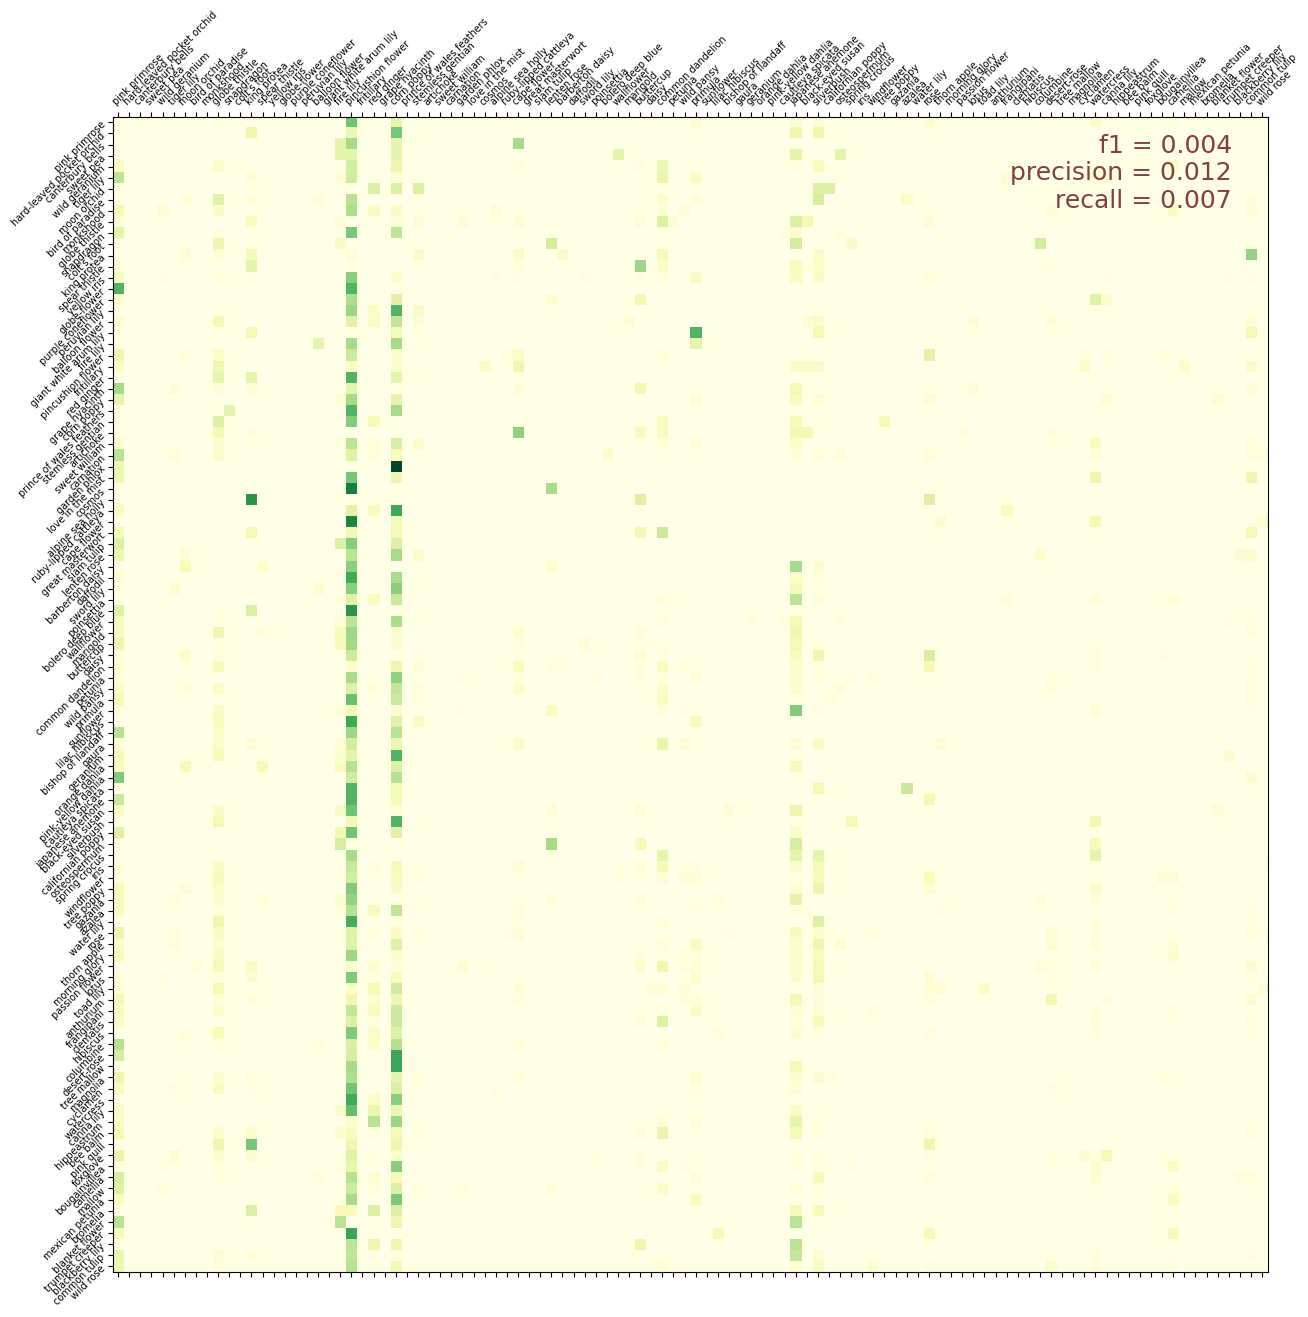

In [38]:

score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
data_vis.display_confusion_matrix(cmat, score, precision, recall)

In [ ]:
"""
#Since the entire matrix is too large to be visualised at once I made an example subset of it

# Define class names
class_names = data_load.CLASSES[:10]

# Get confusion matrix for first 10 classes
cmat_subset = cmat[:10, :10]

# Normalize confusion matrix
#cmat_subset = (cmat_subset.T / cmat_subset.sum(axis=1)).T

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cmat_subset, cmap='YlGn')

# Show all ticks
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))

# Label ticks with class names
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Axis names
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Loop over data dimensions and create text annotations.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, "{:.2f}".format(cmat_subset[i, j]),
                       ha="center", va="center", color="black")

# Set plot title and colorbar
ax.set_title("Confusion Matrix (Subset)", fontsize=16)
plt.colorbar(im)
plt.show()
"""

## Visual validation

In [39]:

dataset = cmdataset.unbatch().batch(20)
batch = iter(dataset)


1/1 [==============================] - 6s 6s/step


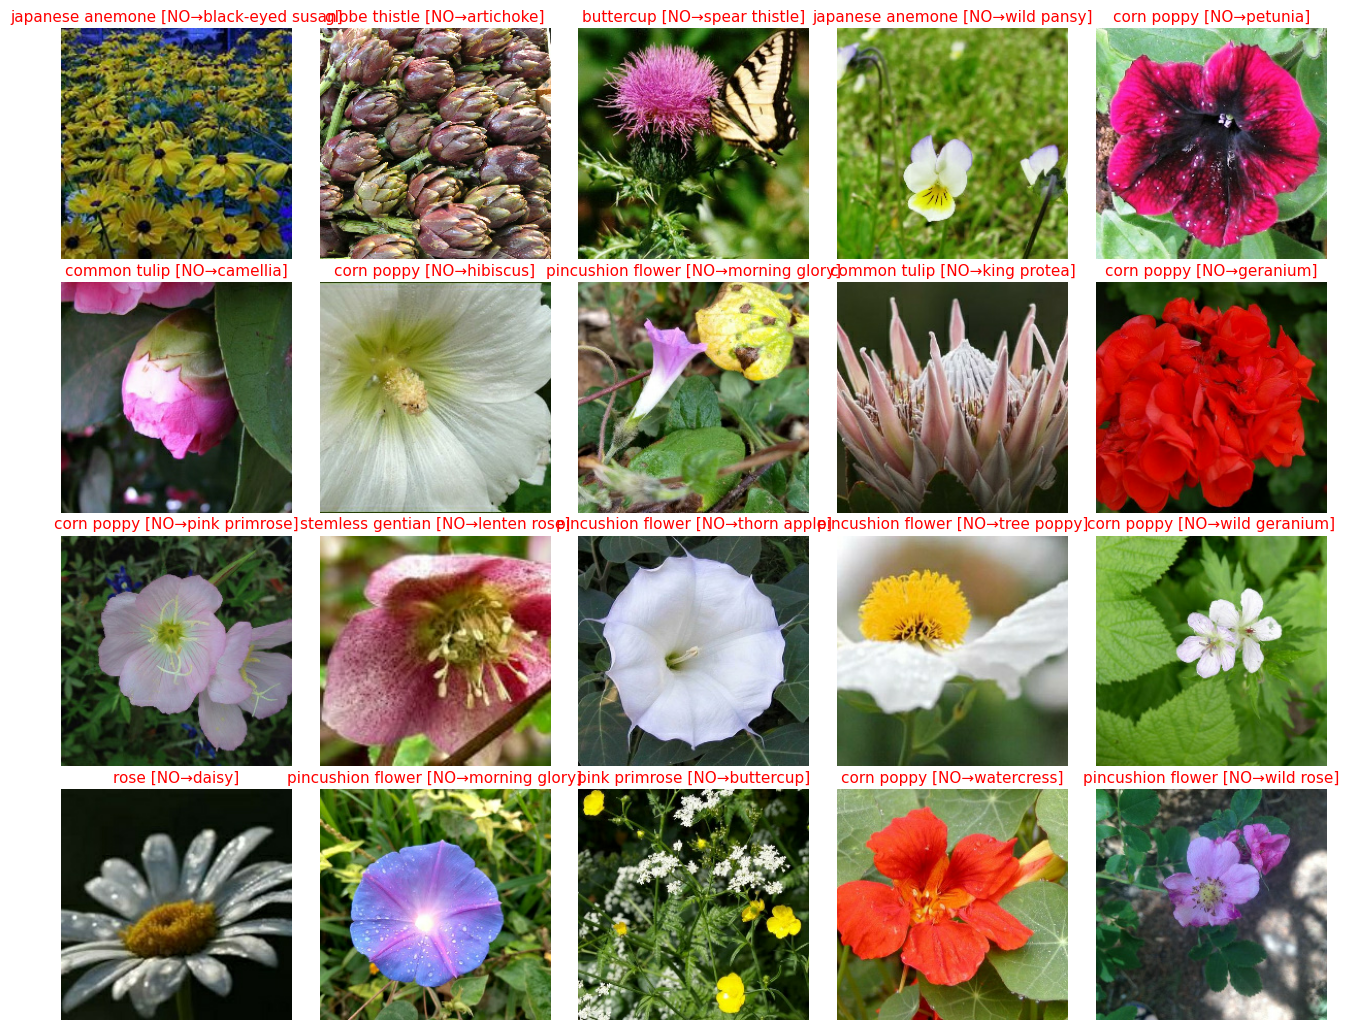

In [40]:

images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
data_vis.display_batch_of_images((images, labels), predictions)


# Predictions to submit

In [41]:
print('Computing predictions...')
test_images_ds = ds_test.map(lambda image, idnum: image).batch(BATCH_SIZE)
probabilities = model.predict(test_images_ds, steps=data_load.TEST_STEPS_PER_EPOCH+1)
predictions = np.argmax(probabilities, axis=-1)
print(predictions)

Computing predictions...
58/58 [==============================] - 3s 43ms/step
[23 21 73 ... 21 20 20]


In [42]:
print('Generating submission.csv file...')
test_ids_ds = ds_test.map(lambda image, idnum: idnum)
test_ids = next(iter(test_ids_ds.batch(data_load.NUM_TEST_IMAGES))).numpy().astype('U') # all in one batch
np.savetxt(f'submission_{model_name}.csv', np.rec.fromarrays([test_ids, predictions]), fmt=['%s', '%d'], delimiter=',', header='id,label', comments='')

Generating submission.csv file...


In [45]:
!head submission_{model_name}.csv

id,label
48c96bd6b,23
59d1b6146,21
7b437ba4e,73
1b7aef8e8,21
d6143b4d4,25
2f90dff16,21
aeb67eefb,9
a29fae12a,49
ae62dc8b0,42


# Submitting

If you haven't already, create your own editable copy of this notebook by clicking on the Copy and Edit button in the top right corner. Then, submit to the competition by following these steps:

1. Begin by clicking on the blue Save Version button in the top right corner of the window. This will generate a pop-up window.
2. Ensure that the Save and Run All option is selected, and then click on the blue Save button.
3. This generates a window in the bottom left corner of the notebook. After it has finished running, click on the number to the right of the Save Version button. This pulls up a list of versions on the right of the screen. Click on the ellipsis (...) to the right of the most recent version, and select Open in Viewer. This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the Output tab on the right of the screen. Then, click on the file you would like to submit, and click on the blue Submit button to submit your results to the leaderboard.

You have now successfully submitted to the competition!